In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Data preparation

In [4]:
df = pd.read_csv(r"E:\3.spyder\Regression\price regression\avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [8]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# Missing value checking

In [11]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

# Dropping unnecessary columns

In [14]:
df = df.drop(['Unnamed: 0','4046','4225','4770','Date'],axis=1)

In [16]:
df.head()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [18]:
def get_avarage(df,column):
    """
    Description: This function to return the average value of the column 

    Arguments:
        df: the DataFrame. 
        column: the selected column. 
    Returns:
        column's average 
    """
    return sum(df[column])/len(df)

In [20]:
def get_avarge_between_two_columns(df,column1,column2):
    """
    Description: This function calculate the average between two columns in the dataset

    Arguments:
        df: the DataFrame. 
        column1:the first column. 
        column2:the scond column.
    Returns:
        Sorted data for relation between column1 and column2
    """
    
    List=list(df[column1].unique())
    average=[]

    for i in List:
        x=df[df[column1]==i]
        column1_average= get_avarage(x,column2)
        average.append(column1_average)

    df_column1_column2=pd.DataFrame({'column1':List,'column2':average})
    column1_column2_sorted_index=df_column1_column2.column2.sort_values(ascending=False).index.values
    column1_column2_sorted_data=df_column1_column2.reindex(column1_column2_sorted_index)
    
    return column1_column2_sorted_data

In [22]:
def plot(data,xlabel,ylabel):
    """
    Description: This function to draw a barplot

    Arguments:
        data: the DataFrame. 
        xlabel: the label of the first column. 
        ylabel: the label of the second column.
    Returns:
        None
    """
        
    plt.figure(figsize=(15,5))
    ax=sns.barplot(x=data.column1,y=data.column2,palette='rocket')
    plt.xticks(rotation=90)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(('Avarage '+ylabel+' of Avocado According to '+xlabel));

# Which region are the lowest and highesr price of Avocado

C:\Users\User\AppData\Local\Temp\ipykernel_14464\640296719.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=data.column1,y=data.column2,palette='rocket')


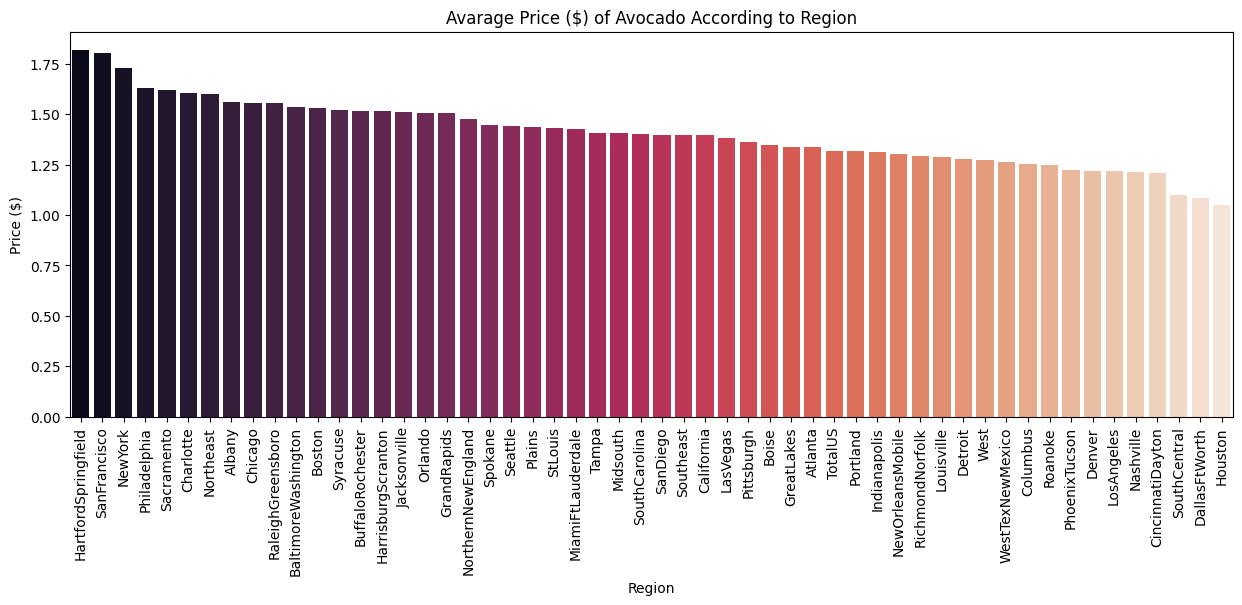

In [25]:
data1 = get_avarge_between_two_columns(df,'region','AveragePrice')
plot(data1,'Region','Price ($)')

In [27]:
print(data1['column1'].iloc[-1], " is the region producing avocado with the lowest price.")

Houston  is the region producing avocado with the lowest price.


# What is the highest region of avacado production

Text(0.5, 1.0, 'Figure: Boxplot repersenting outlier columns.')

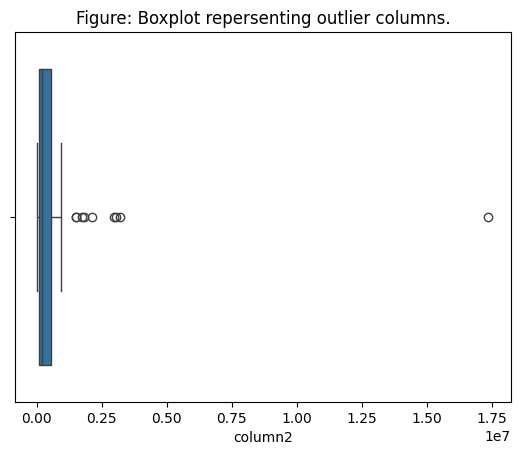

In [30]:
# checking if there are outlier values or not.

data2 = get_avarge_between_two_columns(df,'region','Total Volume')
sns.boxplot(x=data2.column2).set_title("Figure: Boxplot repersenting outlier columns.")

In [32]:
outlier_region = data2[data2.column2>10000000]
print(outlier_region['column1'].iloc[-1], "is outlier value")

TotalUS is outlier value


In [34]:
# Remove the outlier values

outlier_region.index
data2 = data2.drop(outlier_region.index,axis=0)

C:\Users\User\AppData\Local\Temp\ipykernel_14464\640296719.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=data.column1,y=data.column2,palette='rocket')


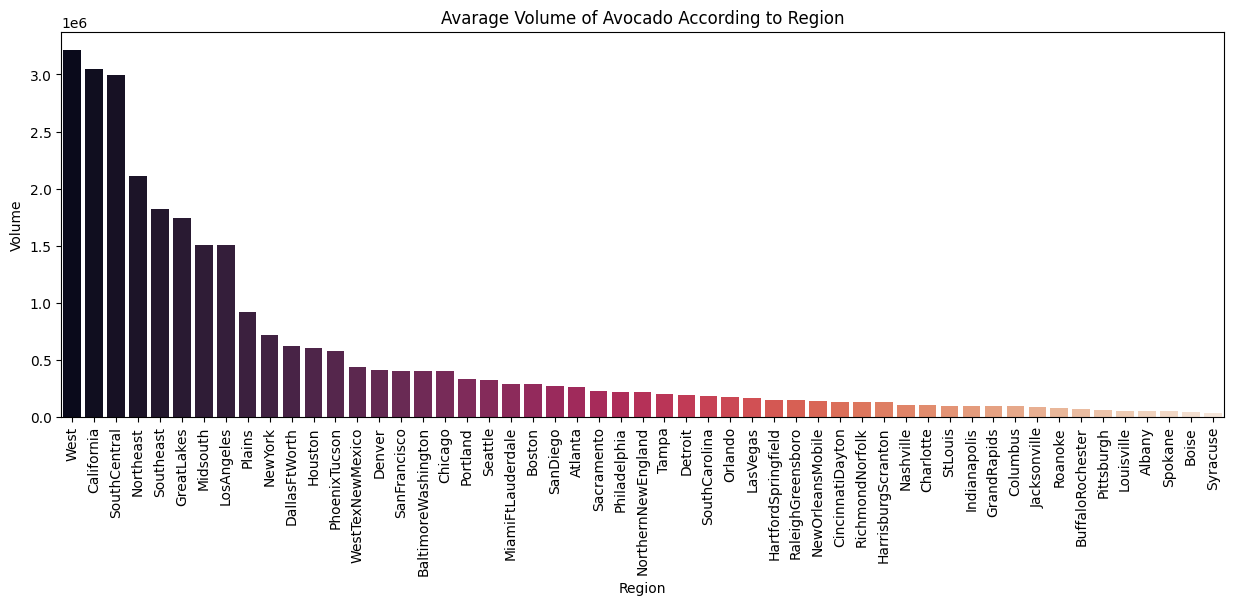

In [36]:
plot(data2,'Region','Volume')

# What is the average avocado prices in each year

C:\Users\User\AppData\Local\Temp\ipykernel_14464\640296719.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=data.column1,y=data.column2,palette='rocket')


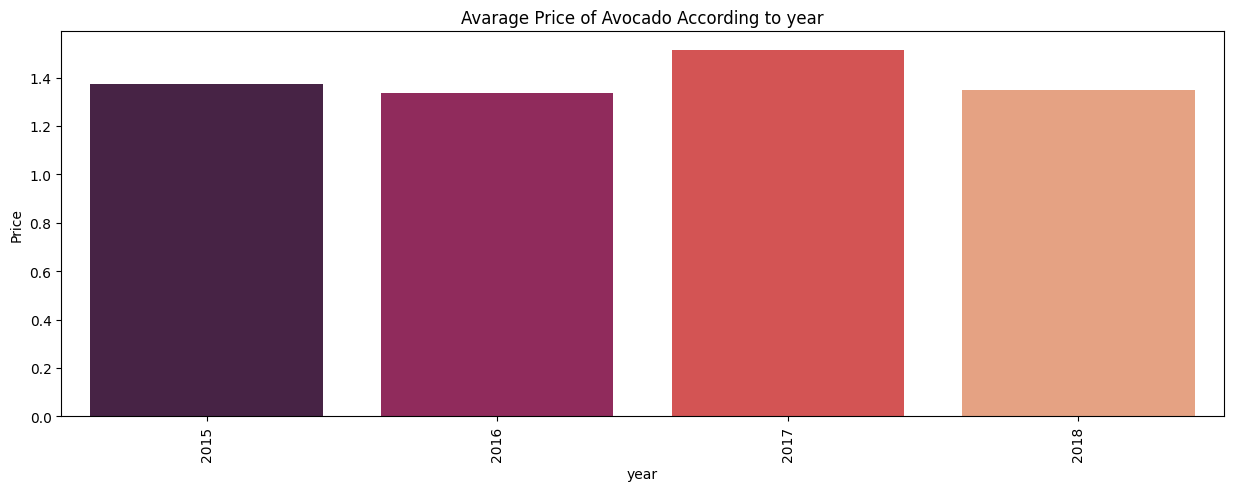

In [39]:
data3 = get_avarge_between_two_columns(df,'year','AveragePrice')
plot(data3,'year','Price')

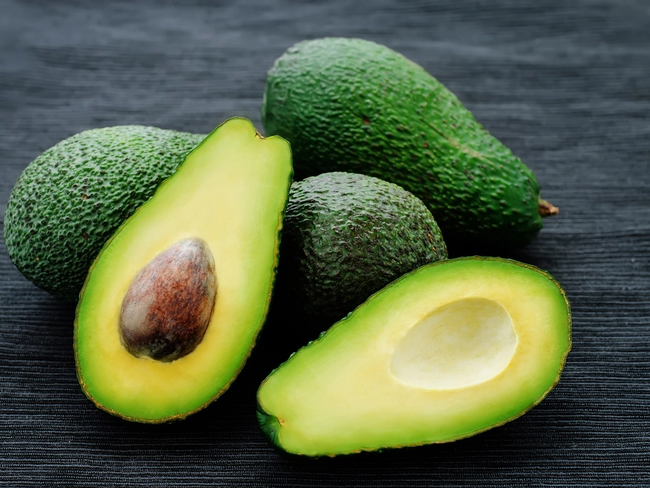

In [41]:
#display image using python
from IPython.display import Image
url = 'https://img.etimg.com/thumb/msid-71806721,width-650,imgsize-807917,,resizemode-4,quality-100/avocados.jpg'
Image(url,height=300,width=400)

In [43]:
data = pd.read_csv(r"E:\3.spyder\Regression\price regression\avocado.csv")

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [47]:
data.head(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


C:\Users\User\AppData\Local\Temp\ipykernel_14464\2985105532.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['AveragePrice']);


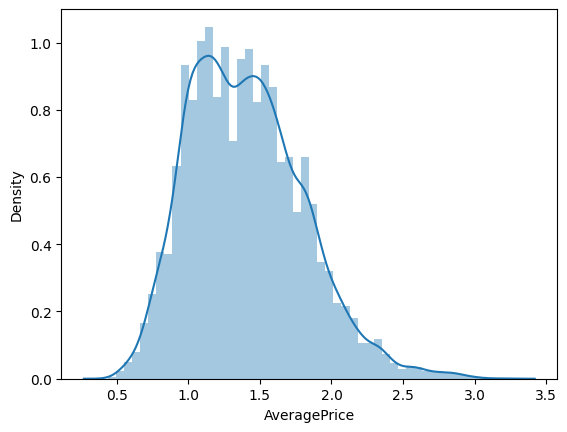

In [49]:
sns.distplot(data['AveragePrice']);

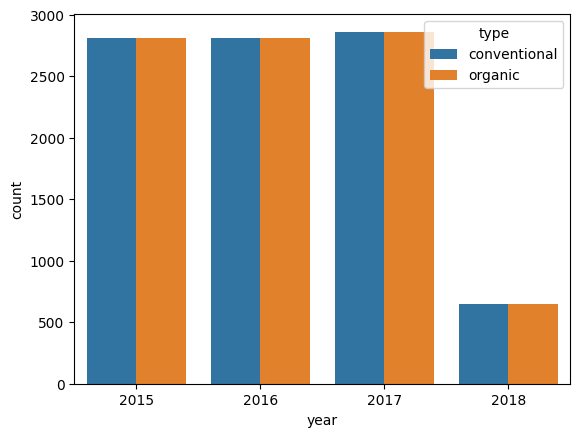

In [51]:
sns.countplot(x='year',data=data,hue='type');

In [53]:
# There are almost equal numbers of conventional and organic avocados.Though,there is very less observation in the year 2018

In [55]:
data.year.value_counts()

year
2017    5722
2016    5616
2015    5615
2018    1296
Name: count, dtype: int64

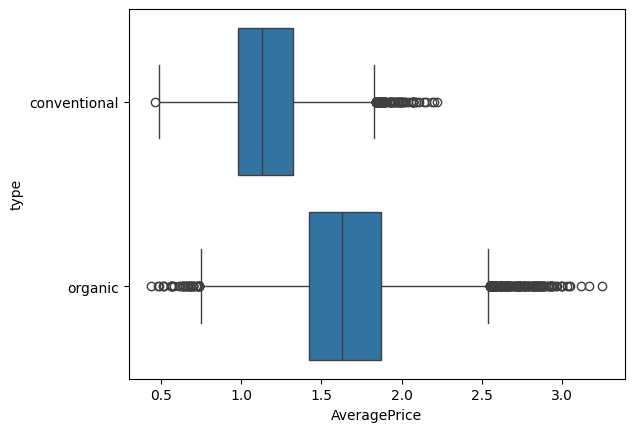

In [57]:
sns.boxplot(y="type", x="AveragePrice", data=data);

In [59]:
# Organic avocados are more expensive. This is obvious, because their cultivation is more expensive and we all love natural products and are willing to pay a higher price for them.

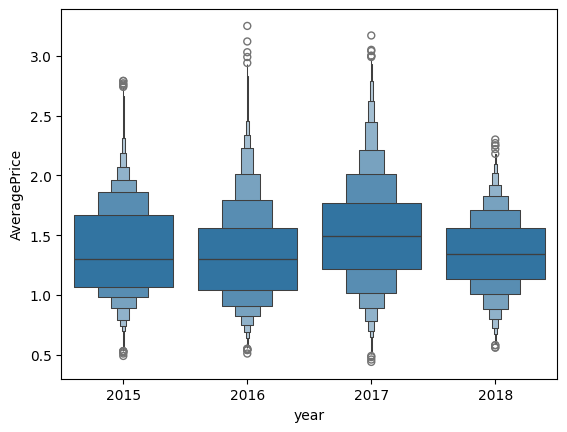

In [61]:
data.year=data.year.apply(str)
sns.boxenplot(x="year", y="AveragePrice", data=data);

In [63]:
# Avacados were slightly more expensive in the year 2017.(as there was shortage due to some reasons)

# Dealing with categorical features

In [66]:
data['type']= data['type'].map({'conventional':0,'organic':1})

# Extracting month from date column.
data.Date = data.Date.apply(pd.to_datetime)
data['Month']=data['Date'].apply(lambda x:x.month)
data.drop('Date',axis=1,inplace=True)
data.Month = data.Month.map({1:'JAN',2:'FEB',3:'MARCH',4:'APRIL',5:'MAY',6:'JUNE',7:'JULY',8:'AUG',9:'SEPT',10:'OCT',11:'NOV',12:'DEC'})

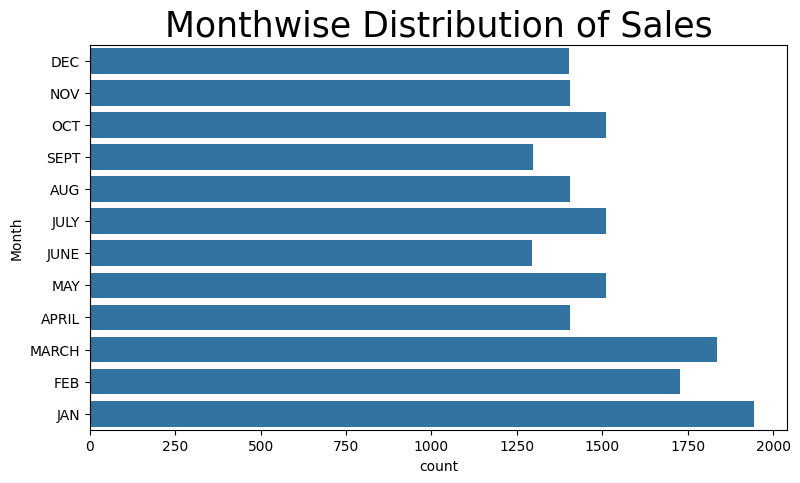

In [68]:
plt.figure(figsize=(9,5))
sns.countplot(data['Month'])
plt.title('Monthwise Distribution of Sales',fontdict={'fontsize':25});

In [70]:
# it implies that sales of avacado see a rise in anuary,Febuary and March.

# Preparing data for ML models

In [73]:
# Creating dummy variables
dummies = pd.get_dummies(data[['year','region','Month']],drop_first=True)
df_dummies = pd.concat([data[['Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type']],dummies],axis=1)
target = data['AveragePrice']

# Splitting data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_dummies,target,test_size=0.30)

# Standardizing the data
cols_to_std = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags','Large Bags', 'XLarge Bags']
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train[cols_to_std])
X_train[cols_to_std] = scaler.transform(X_train[cols_to_std])
X_test[cols_to_std] = scaler.transform(X_test[cols_to_std])

In [75]:
#importing ML models from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [77]:
#to save time all models can be applied once using for loop
regressors = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'Support Vector Machines' : SVR(gamma=1),
    'K-nearest Neighbors' : KNeighborsRegressor(n_neighbors=1),
    'XGBoost' : XGBRegressor()
}
results=pd.DataFrame(columns=['MAE','MSE','R2-score'])
for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.round(r2_score(y_test,pred),3)
                         ]

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\User\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\User\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\User\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\User\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp,

# Deep Neural Networks


In [80]:
# Splitting train set into training and validation sets.
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.20)

#importing tensorflow libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

#creating model
model = Sequential()
model.add(Dense(76,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(200,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.5))
model.add(Dense(1))

model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=10)

In [84]:
# Check for missing values
print(X_train.isnull().sum())  # Check if there are any missing values in X_train
print(y_train.isnull().sum())  # Check if there are any missing values in y_train

# Fill missing values if any (you can use other strategies like mean imputation)
X_train = X_train.fillna(0)
y_train = y_train.fillna(0)
X_val = X_val.fillna(0)
y_val = y_val.fillna(0)

# Convert the data to float32 type
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_val = X_val.astype('float32')
y_val = y_val.astype('float32')

# Check data types after conversion
print(X_train.dtypes)
print(y_train.dtypes)

# Now, fit the model with the preprocessed data
model.fit(x=X_train.values, y=y_train.values,
          validation_data=(X_val.values, y_val.values),
          batch_size=100, epochs=150, callbacks=[early_stop])


Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
               ..
Month_MARCH     0
Month_MAY       0
Month_NOV       0
Month_OCT       0
Month_SEPT      0
Length: 76, dtype: int64
0
Total Volume    float32
4046            float32
4225            float32
4770            float32
Total Bags      float32
                 ...   
Month_MARCH     float32
Month_MAY       float32
Month_NOV       float32
Month_OCT       float32
Month_SEPT      float32
Length: 76, dtype: object
float32
Epoch 1/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - loss: 0.6209 - val_loss: 0.0891
Epoch 2/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1204 - val_loss: 0.0578
Epoch 3/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0984 - val_loss: 0.0482
Epoch 4/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0836 - val_loss: 0.0394
Epoch 5/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0799 - val_loss: 0.0396
Epoch 6/150
103/103 ━━━━━━━━━━━━━━━━━━━━

In [99]:
model.fit(x=X_train.values,y=y_train.values,
          validation_data=(X_val.values,y_val.values),
          batch_size=100,epochs=150,callbacks=[early_stop])

Epoch 1/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0192 - val_loss: 0.0240
Epoch 2/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0194 - val_loss: 0.0232
Epoch 3/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0201 - val_loss: 0.0233
Epoch 4/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0181 - val_loss: 0.0228
Epoch 5/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0198 - val_loss: 0.0230
Epoch 6/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0183 - val_loss: 0.0244
Epoch 7/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0190 - val_loss: 0.0223
Epoch 8/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0190 - val_loss: 0.0238
Epoch 9/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0189 - val_loss: 0.0235
Epoch 10/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0189 - val_loss: 0.0230
Epoch 11/150
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0179 - val_loss: 0.0226
Epoch 12/150
103/103 ━━━━━━━━━━━━━━━━━

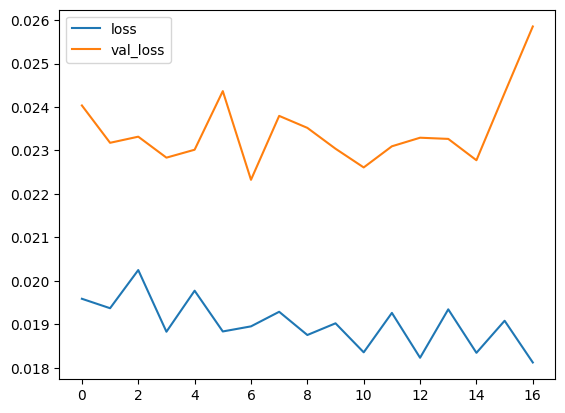

In [101]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot();

In [103]:
dnn_pred = model.predict(X_test)

172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


# Results Table

In [106]:
results.loc['Deep Neural Network']=[mean_absolute_error(y_test,dnn_pred),mean_squared_error(y_test,dnn_pred),
                                    r2_score(y_test,dnn_pred)]
results

,MAE,MSE,R2-score
Linear Regression,0.184000,0.059000,0.64200
Decision Tree,0.137000,0.042000,0.74500
Random Forest,0.097000,0.019000,0.88600
Support Vector Machines,0.118000,0.029000,0.82800
K-nearest Neighbors,0.101000,0.025000,0.85200
XGBoost,0.094000,0.017000,0.90000
Deep Neural Network,0.120795,0.027021,0.83729


In [108]:
f"10% of mean of target variable is {np.round(0.1 * data.AveragePrice.mean(),3)}"

'10% of mean of target variable is 0.141'

In [110]:
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Greens',subset=['R2-score'])

,MAE,MSE,R2-score
XGBoost,0.094000,0.017000,0.900000
Random Forest,0.097000,0.019000,0.886000
K-nearest Neighbors,0.101000,0.025000,0.852000
Deep Neural Network,0.120795,0.027021,0.837290
Support Vector Machines,0.118000,0.029000,0.828000
Decision Tree,0.137000,0.042000,0.745000
Linear Regression,0.184000,0.059000,0.642000


In [ ]:
import pickle

with open('xgboost_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model saved as 'xgboost_model.pkl'")